In [1]:
#!pip install xlrd
import xlrd #reading in excel files
import pprint as pp
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
#!pip install seaborn
import seaborn as sns
#!pip install sklearn
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv('project_cleaned_transformed_data.csv')

In [3]:
df.drop([ 'Unnamed: 0'], axis=1,inplace=True)

In [4]:
df.head()

,S1,S2,S3,hQ1ra,hQ1rb,hQ1rd,hQ1re,hQ1rf,hQ1rh,hQ1ri,...,D10ra,D10rb,qtime,D7,BMI,BMI_group,points,attitude_group,Q13_bin,Q14_bin
0,0,1,52,0,0,-1,0,0,2,1,...,5,2,657.14,1,21.031478,1,19,5,0,0
1,0,0,39,0,0,0,1,0,1,1,...,6,2,885.05,1,35.304054,3,18,6,1,0
2,0,1,30,-1,-1,-1,-1,0,2,2,...,6,0,777.58,3,20.341435,1,6,6,1,1
3,0,1,21,0,0,-1,0,0,2,1,...,5,8,654.48,1,22.804931,1,0,6,0,0
4,0,0,43,0,0,0,0,0,1,1,...,5,7,437.95,2,33.356872,3,20,6,0,0


#Q1-Q6 Wellness

In [5]:
df.columns.get_loc('hQ1ra')#3
df.columns.get_loc('hQ6')#27

27

In [6]:
#df.drop(df.iloc[:,3:28], axis=1, inplace=True)

# Q7 food comsumption

In [7]:
df.groupby('Q7_1raa').size()

Q7_1raa
0    582
1    400
dtype: int64

healthy 

In [8]:
frozen_unhealty=['Q7_1raa','Q7_1rad','Q7_1raf','Q7_1rai','Q7_1raj','Q7_1rak','Q7_1ral']
frozen_healty=['Q7_1rab','Q7_1rac','Q7_1rag','Q7_1rah','Q7_1rae']
#doubt :frozen vegetable 
dairy_healty=['Q7_2ran','Q7_2rao','Q7_2rap','Q7_2rav','Q7_2raw','Q7_2rax']
dairy_unlhealthy=['Q7_2ram','Q7_2raq','Q7_2rar','Q7_2ras','Q7_2rat','Q7_2rau']
#doubt:doesn't say natural orange juice or not
produce_healty=['Q7_3ray','Q7_3raz','Q7_3rba','Q7_3rbb','Q7_3rbc','Q7_3rbd','Q7_3rbe','Q7_3rbf','Q7_3rbg','Q7_3rbi','Q7_3rbj']             
produce_unlhealthy=['Q7_3rbh']
#doubt:
beverage_healthy=['Q7_4rbk','Q7_4rbl','Q7_4rbm','Q7_4rbn','Q7_4rbq','Q7_4rbu','Q7_4rbv','Q7_4rbw']
beverage_unhealthy=['Q7_4rbo','Q7_4rbp','Q7_4rbr','Q7_4rbs','Q7_4rbt','Q7_4rbx','Q7_4rby']
#doubt:
meat_healthy=['Q7_5rbz','Q7_5rca','Q7_5rcb','Q7_5rcc']
meat_unhealthy=['Q7_5rcd','Q7_5rce','Q7_5rcf']
#doubt:
condiments_healthy=['Q7_6rct','Q7_6rcu','Q7_6rcl','Q7_6rch','Q7_6rci','Q7_6rcj']
condiments_unhealthy=['Q7_6rcg','Q7_6rck','Q7_6rcm','Q7_6rcn','Q7_6rco','Q7_6rcp','Q7_6rcq','Q7_6rcr','Q7_6rcs']
#doubt:
breakfast_healthy=['Q7_7rcx','Q7_7rcz']
breakfast_unhealthy=['Q7_7rcv','Q7_7rcw','Q7_7rcy']
#doubt:
bakery_unhealthy=['Q7_8rda','Q7_8rdb','Q7_8rdc','Q7_8rdd']
#center of store:
Centstore_healthy=['Q7_9rds','Q7_9rdt','Q7_9rdu','Q7_9rdv','Q7_9rdw','Q7_9rdx','Q7_9rdy']
Centstore_unhealthy=['Q7_9rde','Q7_9rdf','Q7_9rdg','Q7_9rdh','Q7_9rdi','Q7_9rdj','Q7_9rdk','Q7_9rdl','Q7_9rdm','Q7_9rdn','Q7_9rdo','Q7_9rdp','Q7_9rdq','Q7_9rdr']
#doubt
confection_unhealthy=['Q7_10rdz','Q7_10rea','Q7_10reb','Q7_10rec']
#doubt
sweetener_healthy=['Q7_11ref','Q7_11reg','Q7_11reh']
sweetener_unhealthy=['Q7_11red']
#doubt
supplement_healthy=['Q7_12rei','Q7_12rej','Q7_12rek','Q7_12rel','Q7_12rem'',''Q7_12ren','Q7_12reo','Q7_12rep']
#doubt
alcohol_unhealthy=['Q7_13req','Q7_13rer','Q7_13res','Q7_13ret','Q7_13reu','Q7_13rev','Q7_13rew','Q7_13rex','Q7_13rey','Q7_13rez','Q7_13rfa','Q7_13rfb']

In [9]:
healthy_food_score=['Q7_12rei','Q7_12rej','Q7_12rek','Q7_12rel','Q7_12rem','Q7_12ren','Q7_12reo','Q7_12rep','Q7_11ref','Q7_11reg','Q7_11reh','Q7_9rds','Q7_9rdt',
                    'Q7_9rdu','Q7_9rdv','Q7_9rdw','Q7_9rdx','Q7_9rdy','Q7_7rcx','Q7_7rcz','Q7_6rct','Q7_6rcu','Q7_6rcl','Q7_6rch','Q7_6rci','Q7_6rcj','Q7_5rbz',
                    'Q7_5rca','Q7_5rcb','Q7_5rcc','Q7_4rbk','Q7_4rbl','Q7_4rbm','Q7_4rbn','Q7_4rbq','Q7_4rbu','Q7_4rbv','Q7_4rbw','Q7_3ray','Q7_3raz','Q7_3rba',
                    'Q7_3rbb','Q7_3rbc','Q7_3rbd','Q7_3rbe','Q7_3rbf','Q7_3rbg','Q7_3rbi','Q7_3rbj','Q7_2ran','Q7_2rao','Q7_2rap','Q7_2rav','Q7_2raw','Q7_2rax',
                    'Q7_1rab','Q7_1rac','Q7_1rag','Q7_1rah','Q7_1rae']

unhealthy_food_score=['Q7_13req','Q7_13rer','Q7_13res','Q7_13ret','Q7_13reu','Q7_13rev','Q7_13rew','Q7_13rex','Q7_13rey','Q7_13rez','Q7_13rfa','Q7_13rfb','Q7_11red',
                   'Q7_10rdz','Q7_10rea','Q7_10reb','Q7_10rec','Q7_9rde','Q7_9rdf','Q7_9rdg','Q7_9rdh','Q7_9rdi','Q7_9rdj','Q7_9rdk','Q7_9rdl','Q7_9rdm','Q7_9rdn',
                   'Q7_9rdo','Q7_9rdp','Q7_9rdq','Q7_9rdr','Q7_8rda','Q7_8rdb','Q7_8rdc','Q7_8rdd','Q7_7rcv','Q7_7rcw','Q7_7rcy',
                   'Q7_6rcg','Q7_6rck','Q7_6rcm','Q7_6rcn','Q7_6rco','Q7_6rcp','Q7_6rcq','Q7_6rcr','Q7_6rcs','Q7_5rcd','Q7_5rce','Q7_5rcf',
                   'Q7_4rbo','Q7_4rbp','Q7_4rbr','Q7_4rbs','Q7_4rbt','Q7_4rbx','Q7_4rby','Q7_3rbh','Q7_2ram','Q7_2raq','Q7_2rar','Q7_2ras','Q7_2rat','Q7_2rau',
                   'Q7_1raa','Q7_1rad','Q7_1raf','Q7_1rai','Q7_1raj','Q7_1rak','Q7_1ral']


In [10]:
df['healthy_food_score']= df.loc[:, healthy_food_score].sum(axis=1)
df['unhealthy_food_score']= df.loc[:, unhealthy_food_score].sum(axis=1)

In [11]:
df['total_food_score']=df['healthy_food_score']-df['unhealthy_food_score']

In [12]:
df['BMI']

0      21.031478
1      35.304054
2      20.341435
3      22.804931
4      33.356872
         ...    
977    32.979921
978    24.370667
979    25.821855
980    21.945890
981    34.967561
Name: BMI, Length: 982, dtype: float64

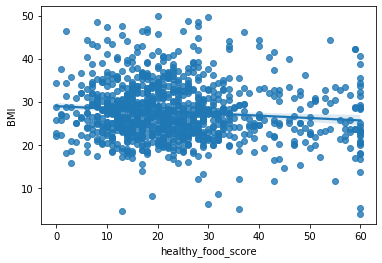

In [13]:
ax = sns.regplot(x='healthy_food_score', y='BMI', data=df)
#df['total_food_score']

In [14]:
np.corrcoef(df['healthy_food_score'], df['BMI'])

array([[ 1.       , -0.1107279],
       [-0.1107279,  1.       ]])

In [15]:
np.corrcoef(df['healthy_food_score'], df['points'])

array([[1.        , 0.16137871],
       [0.16137871, 1.        ]])

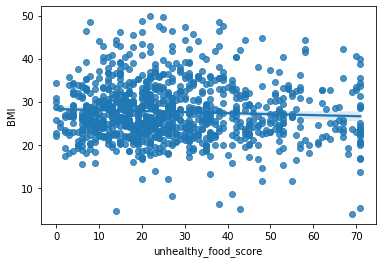

In [16]:
ax = sns.regplot(x='unhealthy_food_score', y='BMI', data=df)

In [17]:
np.corrcoef(df['unhealthy_food_score'], df['BMI'])

array([[ 1.       , -0.0599648],
       [-0.0599648,  1.       ]])

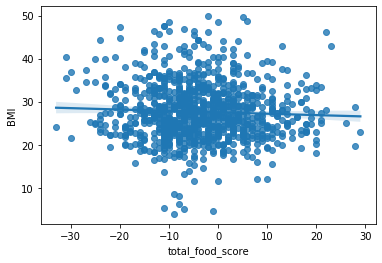

In [18]:
ax = sns.regplot(x='total_food_score', y='BMI', data=df)

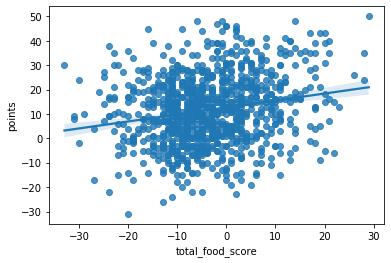

In [19]:
ax = sns.regplot(x='total_food_score', y='points', data=df)

In [20]:
np.corrcoef(df['total_food_score'], df['BMI'])

array([[ 1.        , -0.04770053],
       [-0.04770053,  1.        ]])

In [21]:
a=df.columns.get_loc('Q7_1raa')
b=df.columns.get_loc('Q7_13rfb')

In [22]:
#df.drop(df.iloc[:,a:b], axis=1, inplace=True)

# Q8

After figuring out the cluster we will see which stores each cluster buys from.

### Q9

In [23]:
df['dinner_style']= df.loc[:, 'Q9c1':'Q9c4'].sum(axis=1)/4

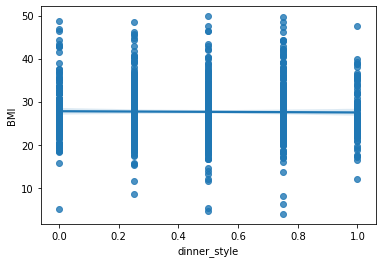

In [24]:
ax = sns.regplot(x='dinner_style', y='BMI', data=df)

In [25]:
np.corrcoef(df['dinner_style'], df['BMI'])

array([[ 1.        , -0.01276219],
       [-0.01276219,  1.        ]])

In [26]:
a=df.columns.get_loc('Q9c1')
b=df.columns.get_loc('Q9c4')

In [27]:
#df.drop(df.iloc[:,a:b], axis=1, inplace=True)

### Q10

dinner place

In [28]:
df['dinner_place']= df.loc[:, 'Q10r1':'Q10r4'].sum(axis=1)

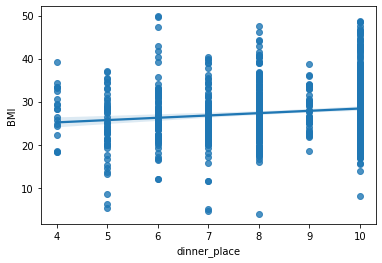

In [29]:
ax = sns.regplot(x='dinner_place', y='BMI', data=df)

In [30]:
np.corrcoef(df['dinner_place'], df['BMI'])

array([[1.        , 0.14107387],
       [0.14107387, 1.        ]])

In [31]:
a=df.columns.get_loc('Q10r1')
b=df.columns.get_loc('Q10r4')

In [32]:
#df.drop(df.iloc[:,a:b], axis=1, inplace=True)

## Q11

Attitude when making dinner

In [33]:
negative_emo =['Q11rb','Q11rc','Q11rf','Q11rg' ,'Q11ri','Q11rm' ,'Q11ro','Q11rs','Q11rt','Q11ry','Q11rz','Q11rbb','Q11rcc','Q11rdd']
Positive_emo= ['Q11ra','Q11rd','Q11re','Q11rh','Q11rj','Q11rk','Q11rl','Q11rn','Q11rp','Q11rq','Q11rt','Q11rv','Q11rw','Q11rx','Q11raa','Q11ree','Q11rff']


In [34]:
df['positive_emo_dinner']= df.loc[:, Positive_emo].sum(axis=1)/len(Positive_emo)
df['negative_emo_dinner']= df.loc[:,negative_emo].sum(axis=1)/len(negative_emo)

In [35]:
df['emotion_dinner']=df['positive_emo_dinner']-df['negative_emo_dinner']

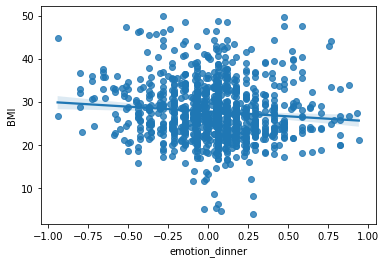

In [36]:
ax = sns.regplot(x='emotion_dinner', y='BMI', data=df)

In [37]:
np.corrcoef(df['emotion_dinner'], df['BMI'])

array([[ 1.       , -0.0957397],
       [-0.0957397,  1.       ]])

In [38]:
a=df.columns.get_loc('Q11ra')
b=df.columns.get_loc('Q11rff')

In [39]:
#df.drop(df.iloc[:,a:b], axis=1, inplace=True)

# Q12

In [40]:
df['Q12']=df['hQ12r1']-df['hQ12r2']

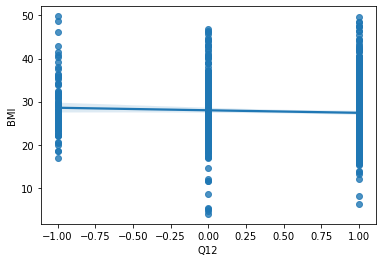

In [41]:
ax = sns.regplot(x='Q12', y='BMI', data=df)

healthy vs unhealthy dinner choice

In [42]:
unhealthy_dinner=['Q12rb','Q12rc','Q12re','Q12rf','Q12rg','Q12rh','Q12rm','Q12rn','Q12ro','Q12rp','Q12rq','Q12rr','Q12rt','Q12raa','Q12rbb','Q12rcc','Q12rdd','Q12ree','Q12rff','Q12rgg','Q12rhh']
healthy_dinner=['Q12ra','Q12rd','Q12ri','Q12rj','Q12rk','Q12rl','Q12rs','Q12ru','Q12rv','Q12rx','Q12ry','Q12rz']

In [43]:
df['healthy_dinner']= df.loc[:, healthy_dinner].sum(axis=1)/len(healthy_dinner)
df['unhealthy_dinner']= df.loc[:,unhealthy_dinner].sum(axis=1)/len(unhealthy_dinner)

In [44]:
df['healthy_dinner_choice']=df['healthy_dinner']-df['unhealthy_dinner']

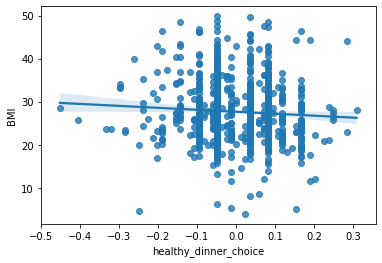

In [45]:
ax = sns.regplot(x='healthy_dinner_choice', y='BMI', data=df)

### Q15

In [46]:
df['cooking_appliance']= df.loc[:, 'Q15ra':'Q15rh'].sum(axis=1)

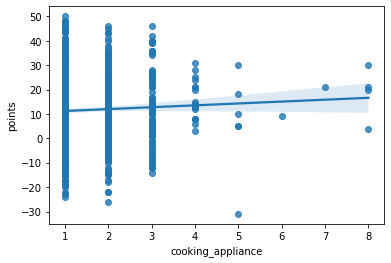

In [47]:
ax = sns.regplot(x='cooking_appliance', y='points', data=df)

## Q16

In [48]:
dinner_maker=['Q16ra','Q16rb','Q16rc','Q16rd','Q16rk']
not_dinner_maker=['Q16re','Q16rf','Q16rg','Q16rh','Q16ri','Q16rj']

In [49]:
df['dinner_maker']= df.loc[:, dinner_maker].astype(bool).sum(axis=1)/len(dinner_maker)
df['not_dinner_maker']= df.loc[:,not_dinner_maker].astype(bool).sum(axis=1)/len(not_dinner_maker)

In [50]:
df['dinner_maker_freq']=df['dinner_maker']-df['not_dinner_maker']

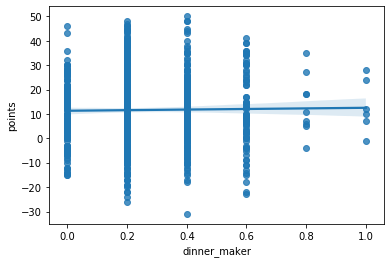

In [51]:
ax = sns.regplot(x='dinner_maker', y='points', data=df)

Q18-23 satistfaction with dinner

In [52]:
df['dinner_satisfaction']= df.loc[:, 'Q18':'Q23'].sum(axis=1)

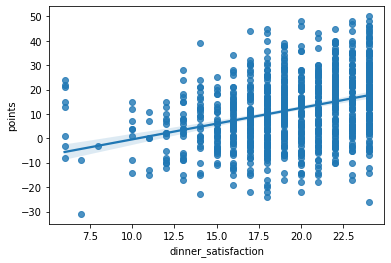

In [53]:
ax = sns.regplot(x='dinner_satisfaction', y='points', data=df)

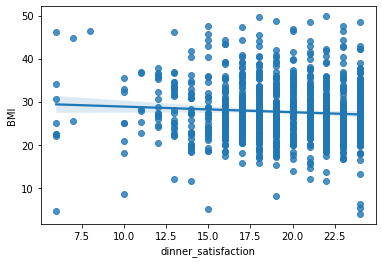

In [54]:
ax = sns.regplot(x='dinner_satisfaction', y='BMI', data=df)

In [55]:
np.corrcoef(df['dinner_satisfaction'], df['Q17'])

array([[1.        , 0.70405388],
       [0.70405388, 1.        ]])

### Q26

In [56]:
df['snack_frequency']= df.loc[:, 'Q26ra':'Q26rh'].sum(axis=1)

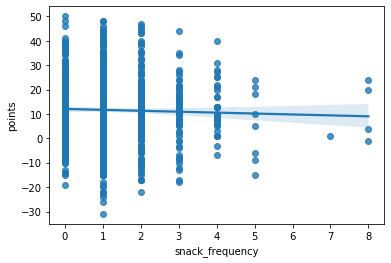

In [57]:
ax = sns.regplot(x='snack_frequency', y='points', data=df)

### Q30 

In [58]:
df['attitudinal']= df.loc[:, 'Q30raa':'Q30rbm'].sum(axis=1)

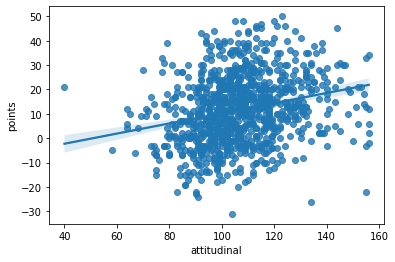

In [59]:
ax = sns.regplot(x='attitudinal', y='points', data=df)

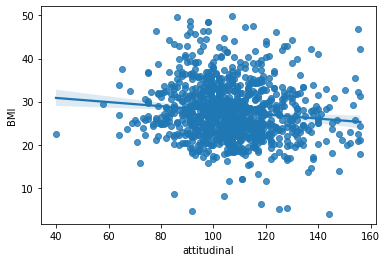

In [60]:
ax = sns.regplot(x='attitudinal', y='BMI', data=df)

In [61]:
df.groupby('D6').size()

D6
15000     107
20000     146
30000     130
42500     139
62500     228
87500     106
150000    103
250000     14
400000      7
500000      2
dtype: int64

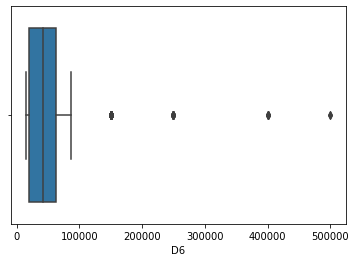

In [62]:
ax = sns.boxplot(x=df["D6"])

In [63]:
df['Income_bin'] = ['High' if x in [500000,400000 ,250000,150000] else 'Low' for x in df['D6']]

In [64]:
df.groupby('Income_bin').size()

Income_bin
High    126
Low     856
dtype: int64

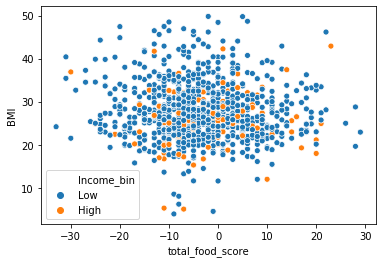

In [65]:
#ax = sns.regplot(x='total_food_score', y='BMI', data=df)
ax = sns.scatterplot(x='total_food_score', y='BMI',hue='Income_bin', data=df )

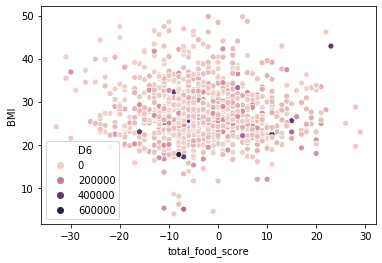

In [66]:
#ax = sns.regplot(x='total_food_score', y='BMI', data=df)
ax = sns.scatterplot(x='total_food_score', y='BMI',hue='D6', data=df )

Feature importance with all the data

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split

Wellness

In [68]:
Y = df.attitude_group
X =df.drop(['BMI_group','D4','qtime','attitude_group','points','D9','hQ1ra','hQ1rb','hQ1rd','hQ1re','hQ1rf', 'hQ1rh', 'hQ1ri', 'hQ1rj','hQ1rk', 'hQ1rm', 'hQ1rn', 'hQ1ro', 'hQ1rp', 'hQ1rq'
 , 'hQ1rr', 'hQ1rs','hQ1rt','hQ2ra','hQ2rb','hQ3ra','hQ3rb','hQ3rc','hQ4','hQ5','hQ6','Income_bin'], axis=1)

# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1,max_depth=4)
# Train model
model = clf.fit(X, Y)
importances = model.feature_importances_
feature_names=list(X.columns)

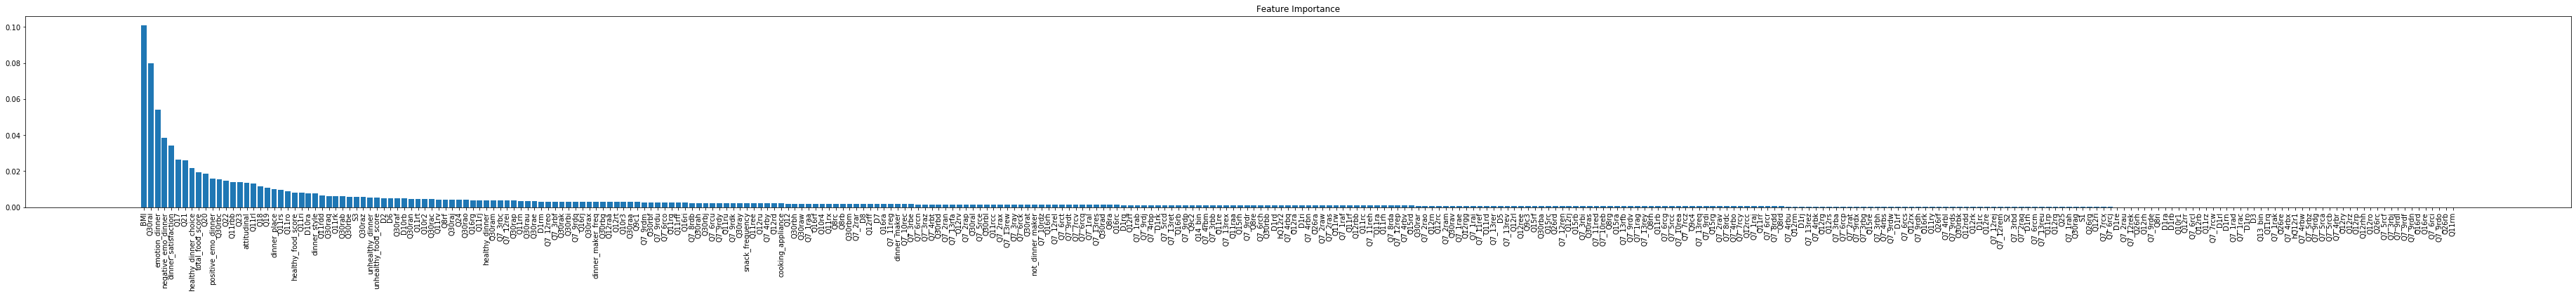

In [69]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]
# Create plot
plt.figure(figsize=(65,5))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)
# Show plot
plt.show()

Feature importance with all of the data

Health

In [72]:
Y = df.BMI_group
X = df.drop(['BMI','BMI_group','D4','qtime','attitude_group','D9','Income_bin'], axis=1)

# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1,max_depth=4)
# Train model
model = clf.fit(X, Y)
importances = model.feature_importances_
feature_names=list(X.columns)

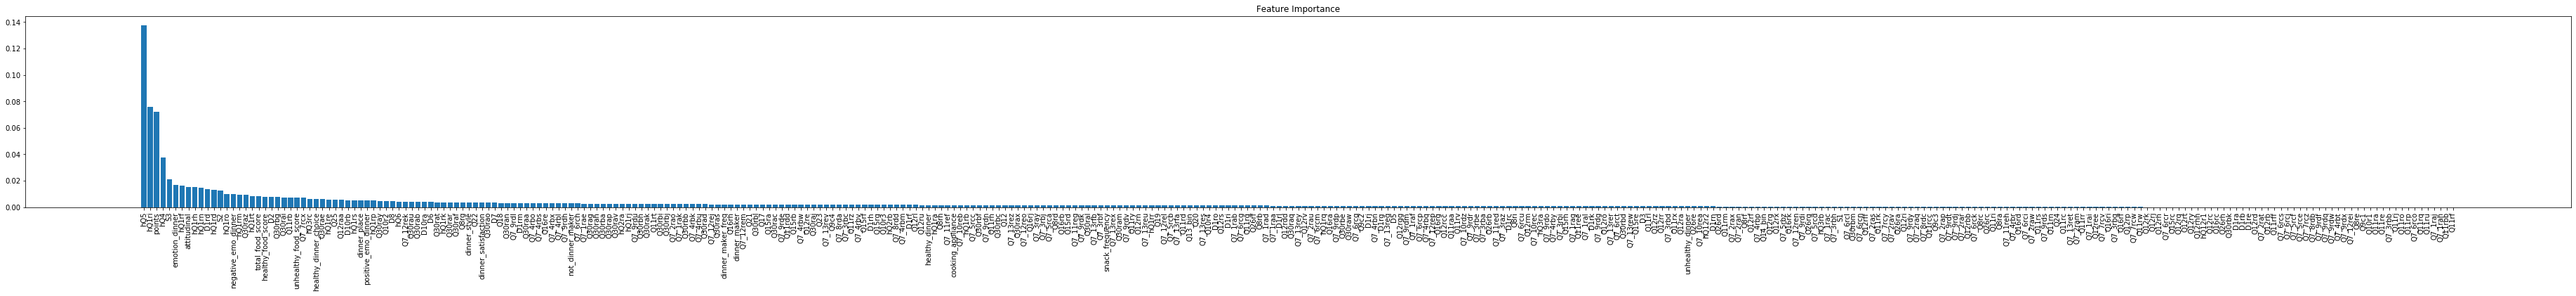

In [73]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]
# Create plot
plt.figure(figsize=(65,5))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)
# Show plot
plt.show()

Important features

Attitude group

In [74]:
df['Income_bin'] = [1 if x in [500000,400000 ,250000,150000] else 0 for x in df['D6']]

In [75]:
Y = df.attitude_group
X = df.drop(['BMI_group','D4','qtime','attitude_group','points','D9','hQ1ra', 'hQ1rb', 'hQ1rd', 'hQ1re', 'hQ1rf', 'hQ1rh', 'hQ1ri', 'hQ1rj',
       'hQ1rk', 'hQ1rm', 'hQ1rn', 'hQ1ro', 'hQ1rp', 'hQ1rq', 'hQ1rr', 'hQ1rs',
       'hQ1rt', 'hQ2ra', 'hQ2rb', 'hQ3ra', 'hQ3rb', 'hQ3rc', 'hQ4', 'hQ5',
       'hQ6'], axis=1)

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [77]:
from sklearn.metrics import r2_score
#!pip install rfpimp
from rfpimp import permutation_importances
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, Y_train)

def r2(rf, X_train, Y_train):
    return r2_score(Y_train, rf.predict(X_train))

perm_imp = permutation_importances(rf, X_train, Y_train, r2)

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [78]:
perm_imp=perm_imp.head(10)

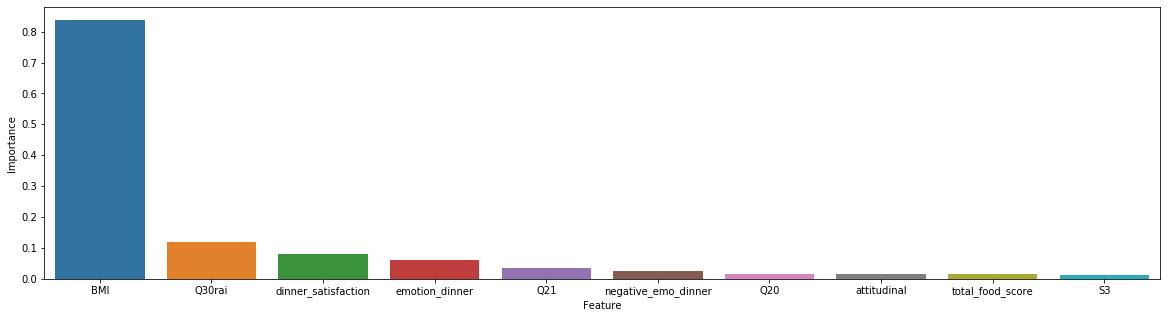

In [79]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x=perm_imp.index, y=perm_imp['Importance'], data=perm_imp, ci=68)

Health

In [80]:
Y = df.BMI
X = df.drop(['BMI_group','D4','qtime','attitude_group','D9','BMI'], axis=1)

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [82]:
from sklearn.metrics import r2_score
#!pip install rfpimp
from rfpimp import permutation_importances
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, Y_train)

def r2(rf, X_train, Y_train):
    return r2_score(Y_train, rf.predict(X_train))

perm_imp = permutation_importances(rf, X_train, Y_train, r2)

In [83]:
perm_imp=perm_imp.head(10)

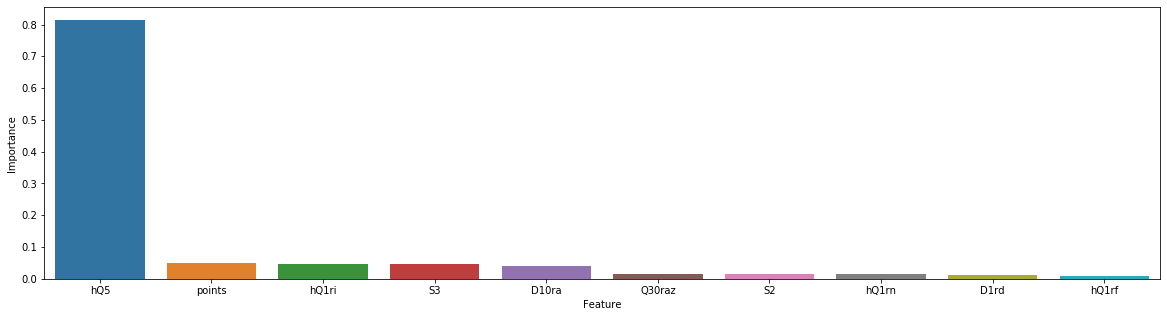

In [84]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x=perm_imp.index, y=perm_imp['Importance'], data=perm_imp, ci=68)

Clustering

In [85]:
df_clustering = df[['BMI','S3','S2','points','D2','D4','D6','hQ4','hQ6','hQ5','total_food_score','dinner_place','emotion_dinner','healthy_dinner_choice','Q13_bin','Q14_bin','dinner_satisfaction','Q25','attitudinal']]

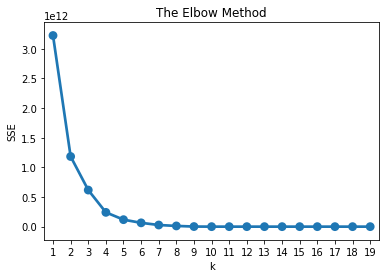

In [86]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df_clustering)
    sse[k] = kmeans.inertia_
    
    
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

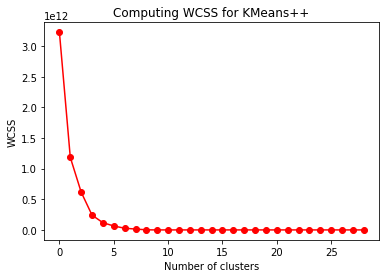

In [87]:
# Use the Elbow method to find a good number of clusters using WCSS
wcss = []
for ii in range( 1, 30 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( df_clustering )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [88]:
kmean= KMeans(5)
kmean.fit(df_clustering)
labels=kmean.labels_

In [89]:
clusters=pd.concat([df_clustering, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BMI,S3,S2,points,D2,D4,D6,hQ4,hQ6,hQ5,total_food_score,dinner_place,emotion_dinner,healthy_dinner_choice,Q13_bin,Q14_bin,dinner_satisfaction,Q25,attitudinal,cluster
0,21.031478,52,1,19,4,2,42500,5,1,0.0,-11,7,-0.071429,-0.047619,0,0,22,0,149,0
1,35.304054,39,0,18,2,1,87500,0,3,-5.0,0,7,0.117647,-0.238095,1,0,19,1,115,3
2,20.341435,30,1,6,2,0,250000,0,5,-2.0,-11,10,-0.214286,0.035714,1,1,24,1,152,2
3,22.804931,21,1,0,3,1,87500,0,-1,0.0,-7,8,-0.214286,-0.190476,0,0,11,0,106,3
4,33.356872,43,0,20,2,0,20000,5,1,0.0,-13,10,0.117647,-0.095238,0,0,24,1,134,0


In [90]:
clusters.groupby('cluster').mean()

,BMI,S3,S2,points,D2,D4,D6,hQ4,hQ6,hQ5,total_food_score,dinner_place,emotion_dinner,healthy_dinner_choice,Q13_bin,Q14_bin,dinner_satisfaction,Q25,attitudinal
cluster,,,,,,,,,,,,,,,,,,,
0,28.319999,41.988506,0.547893,9.840996,2.593870,0.862069,27456.896552,1.402299,1.222222,-1.900383,-4.931034,8.772031,0.027810,-0.003421,0.162835,0.279693,19.191571,0.706897,106.270115
1,26.022032,41.533981,0.398058,15.718447,3.155340,1.135922,150000.000000,1.640777,2.213592,-1.291262,-2.611650,8.038835,0.053276,0.008206,0.242718,0.300971,19.728155,0.796117,109.533981
2,24.490408,38.642857,0.500000,20.142857,2.642857,0.857143,250000.000000,2.571429,2.357143,-0.285714,-2.142857,7.500000,0.022809,0.044218,0.214286,0.428571,19.714286,0.714286,118.642857
3,27.341713,42.449102,0.464072,12.700599,2.808383,0.949102,70434.131737,1.494012,1.928144,-1.691617,-2.038922,8.497006,0.034217,0.008554,0.179641,0.287425,19.380240,0.727545,105.529940
4,25.556112,30.333333,0.777778,13.888889,2.777778,0.777778,422222.222222,1.111111,2.555556,-4.000000,-0.666667,7.666667,0.132120,0.038360,0.222222,0.333333,19.222222,0.666667,113.555556


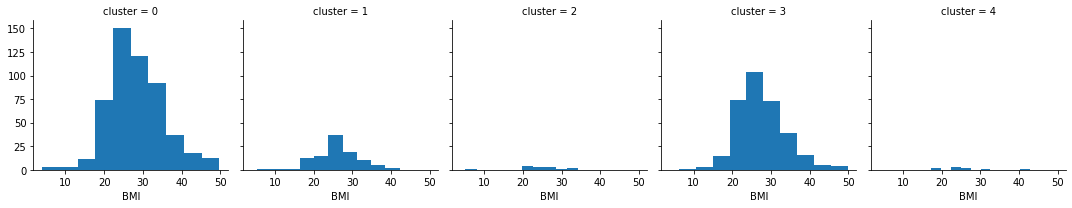

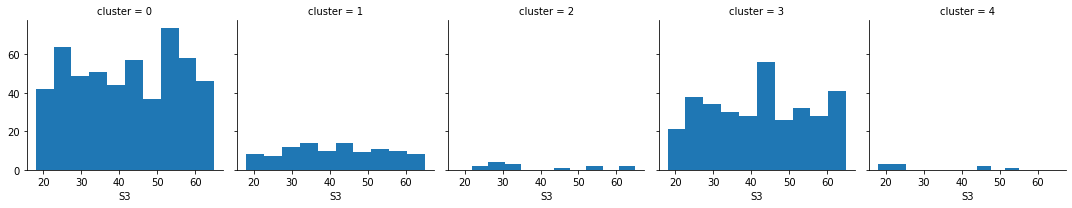

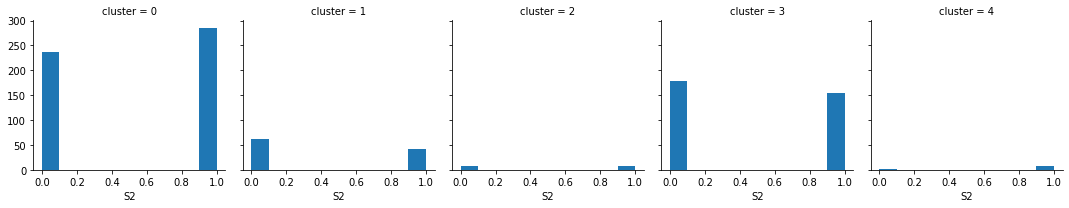

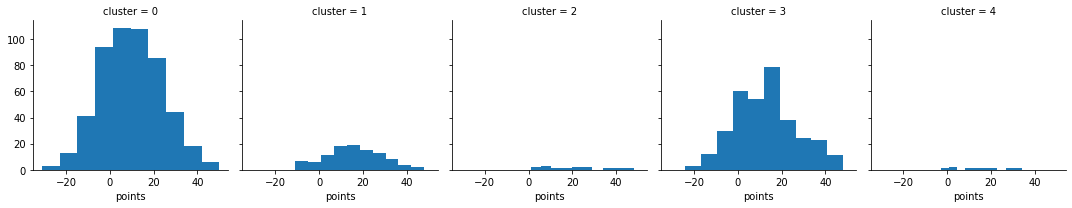

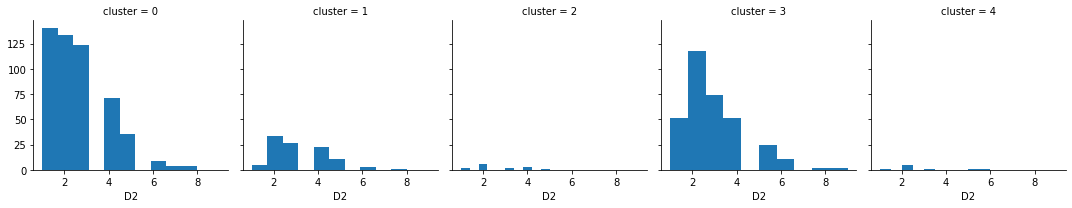

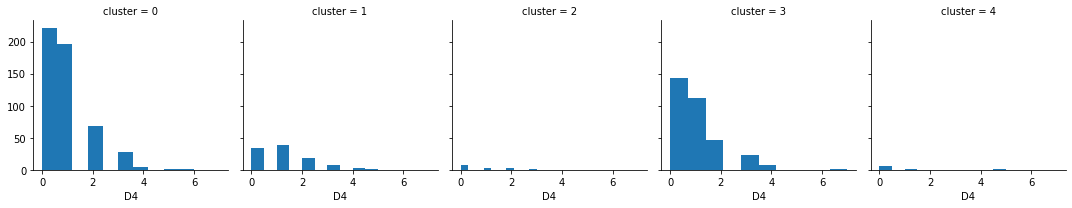

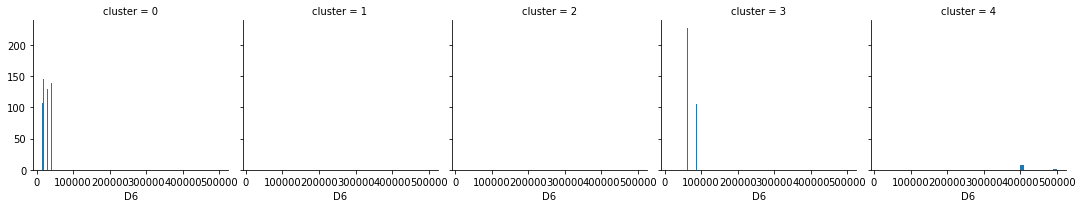

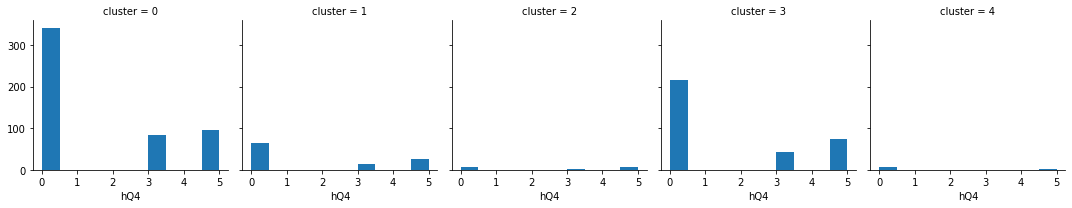

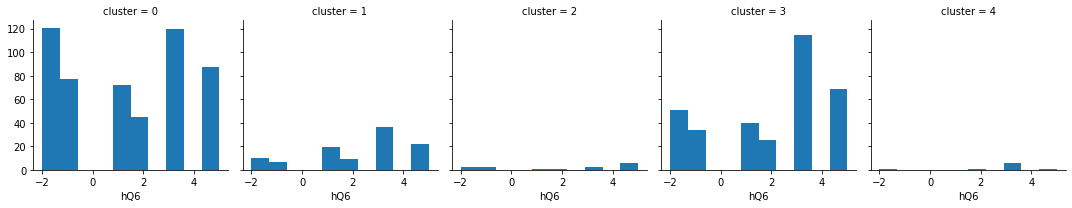

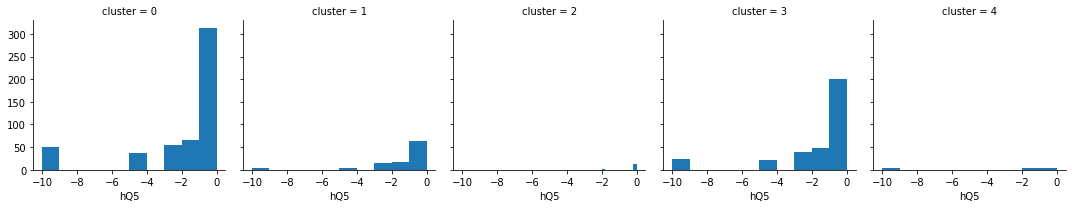

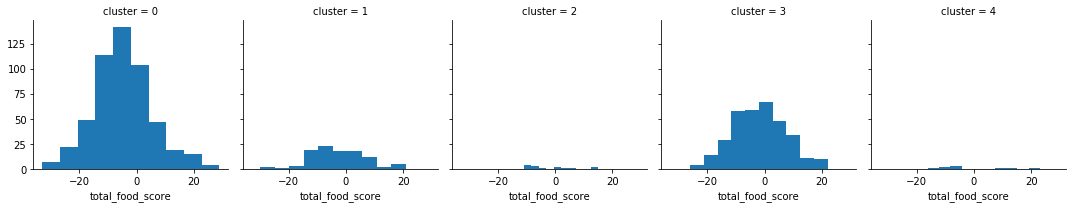

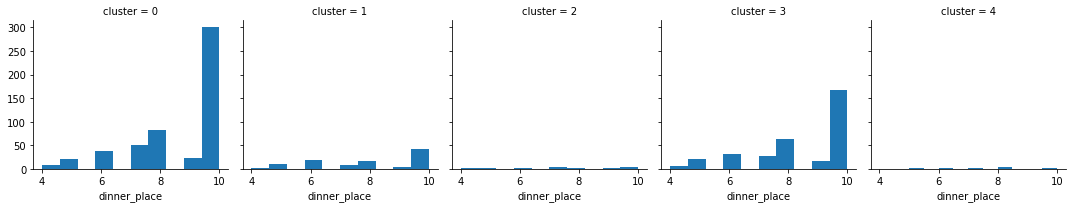

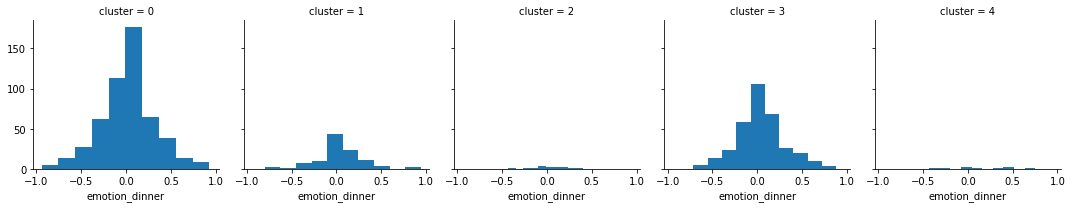

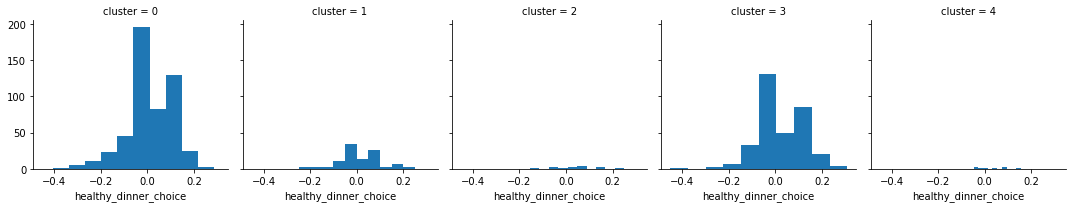

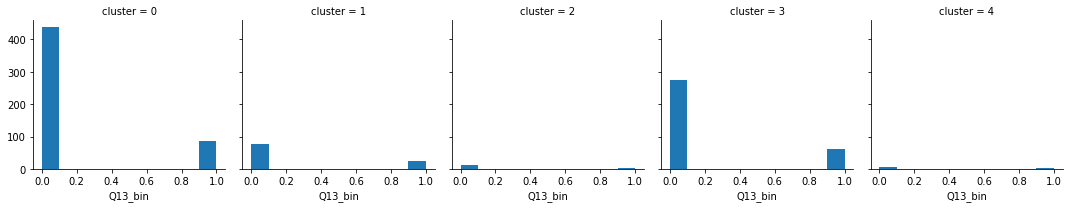

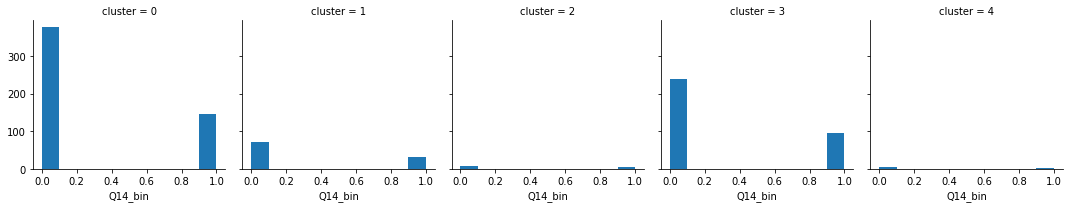

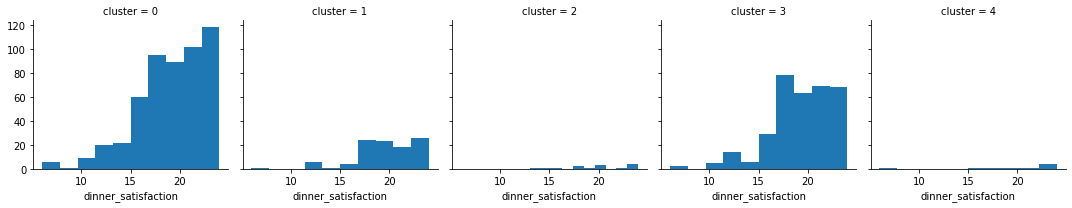

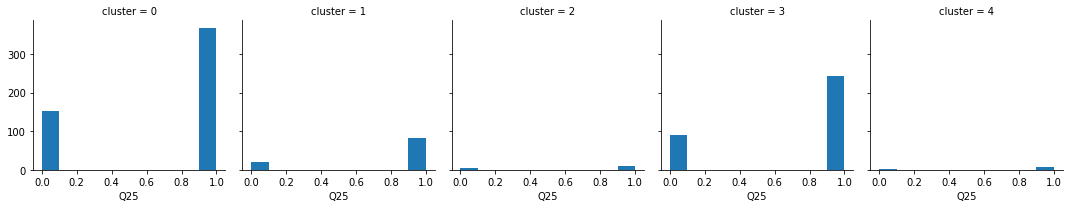

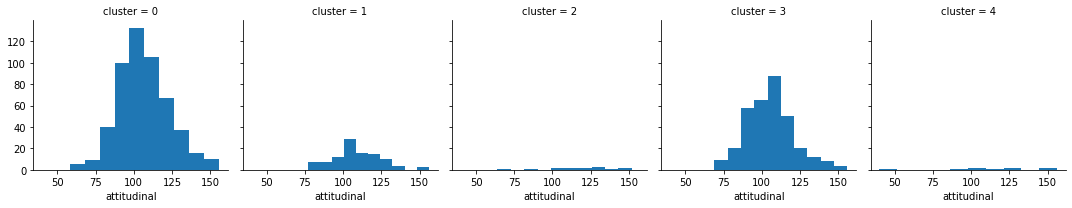

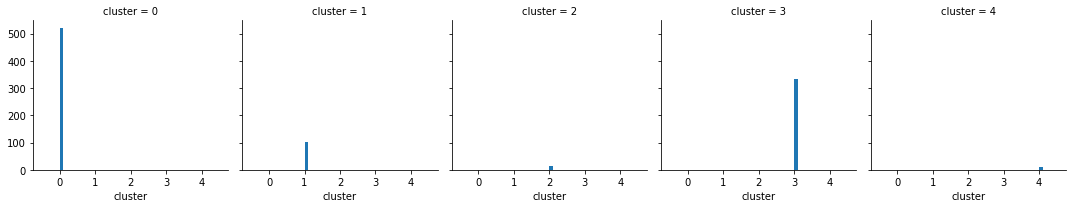

In [91]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

Text(0, 0.5, 'Euclidean distances')

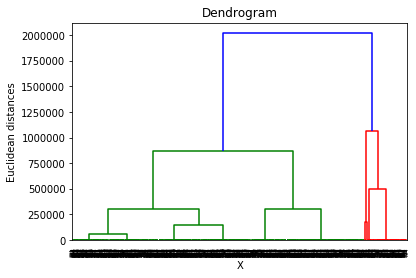

In [92]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_clustering, method  = "ward"))
plt.rcParams['figure.figsize'] = (20, 20)
plt.title('Dendrogram')
plt.xlabel('X')
plt.ylabel('Euclidean distances')

In [93]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(df_clustering)
clusters=pd.concat([df_clustering, pd.DataFrame({'cluster':y_hc})], axis=1)
clusters

,BMI,S3,S2,points,D2,D4,D6,hQ4,hQ6,hQ5,total_food_score,dinner_place,emotion_dinner,healthy_dinner_choice,Q13_bin,Q14_bin,dinner_satisfaction,Q25,attitudinal,cluster
0,21.031478,52,1,19,4,2,42500,5,1,0.0,-11,7,-0.071429,-0.047619,0,0,22,0,149,3
1,35.304054,39,0,18,2,1,87500,0,3,-5.0,0,7,0.117647,-0.238095,1,0,19,1,115,1
2,20.341435,30,1,6,2,0,250000,0,5,-2.0,-11,10,-0.214286,0.035714,1,1,24,1,152,0
3,22.804931,21,1,0,3,1,87500,0,-1,0.0,-7,8,-0.214286,-0.190476,0,0,11,0,106,1
4,33.356872,43,0,20,2,0,20000,5,1,0.0,-13,10,0.117647,-0.095238,0,0,24,1,134,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,32.979921,39,0,-4,3,2,15000,0,1,-10.0,-21,8,0.058824,0.035714,0,1,24,1,119,3
978,24.370667,35,0,8,1,0,30000,0,1,0.0,-5,7,-0.512605,-0.047619,0,0,14,0,102,3
979,25.821855,35,0,28,3,1,62500,0,-2,0.0,-2,10,0.058824,0.035714,0,0,21,0,70,1
980,21.945890,43,1,15,1,0,62500,5,5,0.0,8,10,0.058824,0.083333,0,0,13,1,105,1


### PCA

In [94]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [95]:
Y = df.BMI_group
X = df.drop(['BMI','BMI_group','D10ra','D10rb','D9'], axis=1)

In [96]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [97]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

X_reduced = pca.fit_transform(X)

In [98]:
X_reduced

array([[-1.92131415e+04, -1.61677466e+03,  3.76596486e+01],
       [ 2.57858447e+04, -1.23868768e+03, -1.24740416e+01],
       [ 1.88285303e+05, -8.03931159e+02,  6.03973720e+01],
       ...,
       [ 7.79035012e+02,  7.59893529e+02, -3.76462179e+01],
       [ 5.51931520e+02,  6.88180369e+04,  5.44513324e+00],
       [-4.18454165e+04,  3.79847060e+04,  1.95916861e+01]])

In [99]:
print(pca.components_)
print(pca.explained_variance_)
#pca.get_precision()

[[ 7.62328896e-08 -2.89970607e-07 -1.53576782e-05 ...  7.77969503e-07
   2.82212423e-05  4.64348158e-06]
 [ 5.68748668e-07  3.58660086e-06 -1.10382895e-05 ... -5.11280955e-07
  -1.29270749e-04 -2.06017819e-06]
 [-2.69221723e-03 -8.35715703e-04 -1.88720505e-01 ...  1.31555847e-02
   5.10976141e-01  5.76577903e-04]]
[3.28712245e+09 1.79970713e+07 5.56896541e+02]


In [100]:
np.sum(pca.explained_variance_ratio_)

0.9999997322968823

Are there clusters of consumers who associated with health and wellness? You should think about clustering people based on their physical and psychological attitude. 

How would you profile each segment?

What can motivate change to improve overall health and wellness by segment?
 

Can you have quantitative measurements of people from different
dimensions of healthiness? Which factors explain people attitude towards to be healthier or less healthy, e.g., wealth, time, attitude towards life, …

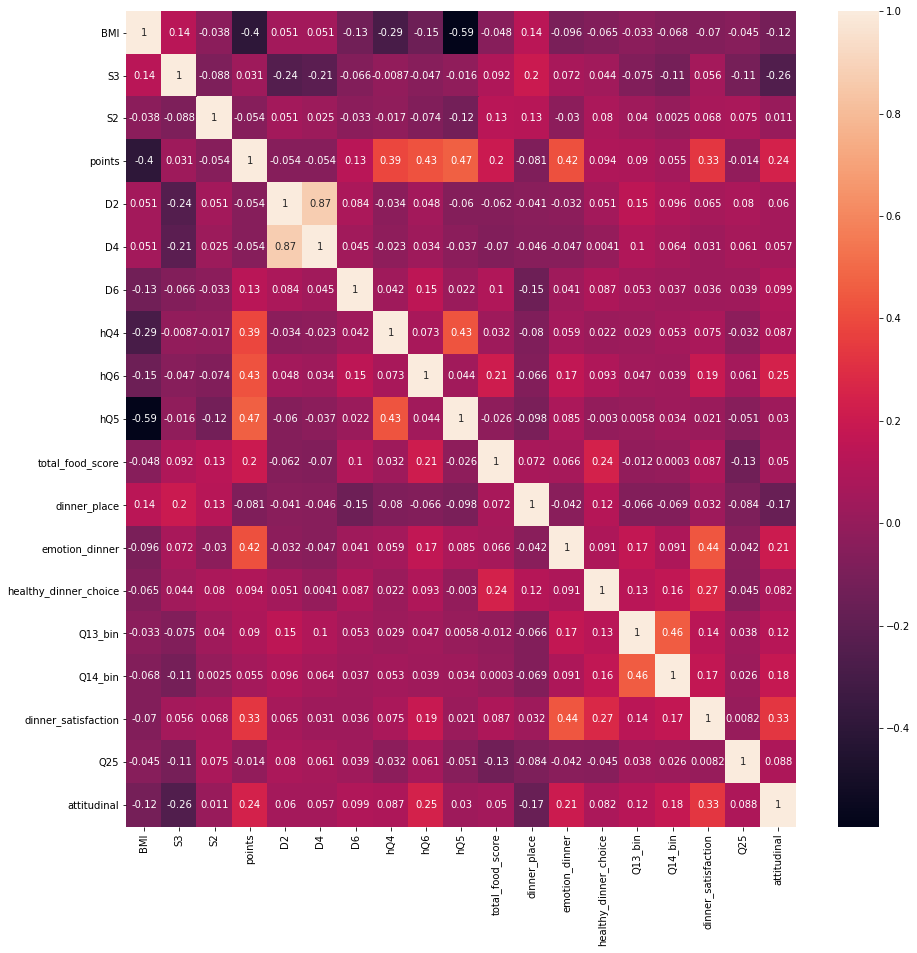

In [101]:
plt.figure(figsize=(15,15))
sns.heatmap(df_clustering.corr(), annot = True)